In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from random import random

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from models import ModelManager, ModelType
from utils import MnistData

In [ ]:
data = MnistData()

## Training

In [13]:
generator = ModelManager.get_untrained(ModelType.GeneratorConv)
discriminator = ModelManager.get_untrained(ModelType.WassersteinCriticConv)

In [ ]:
batch = 10
# batch_of_real_data, _ = data.get_training_batch(batch)
# batch_of_noise = torch.rand(batch, 100)

---2:D:0.6222862601280212:G:1.0154393911361694---


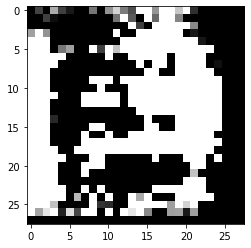

---4:D:-0.23524320125579834:G:1.7212562561035156---


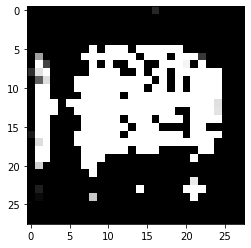

---6:D:0.6558593511581421:G:0.8149056434631348---


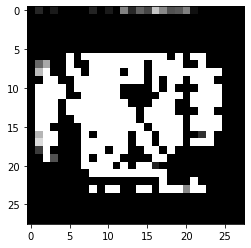

---8:D:0.7511227130889893:G:0.70121169090271---


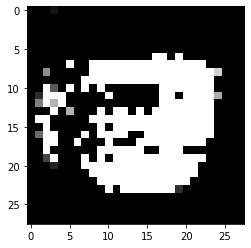

---10:D:-0.13409629464149475:G:1.2562789916992188---


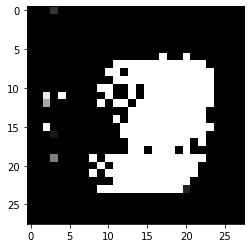

---12:D:-0.4334130883216858:G:1.7023236751556396---


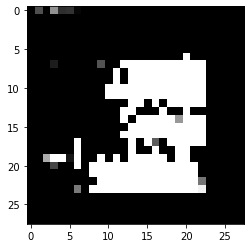

---14:D:0.47742384672164917:G:0.825049102306366---


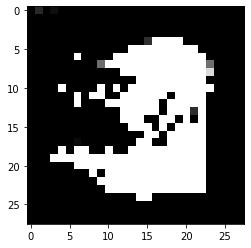

KeyboardInterrupt: 

In [14]:
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=2e-4, betas=(0.5, 0.99), weight_decay=0.1)
generator_optimizer = optim.Adam(generator.parameters(), lr=2e-4, betas=(0.5, 0.99), weight_decay=0.1)


for epoch in range(600 * 200):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.rand(batch, 100)
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = batch_of_generated_discrimination.mean() \
        - batch_of_real_discrimination.mean()
    # discriminator_loss /= 2
    discriminator_loss.backward()

    discriminator_optimizer.step()

    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)

    generator_loss = - batch_of_generated_discrimination.mean()
    discriminator_optimizer.zero_grad()
    generator_optimizer.zero_grad()
    generator_loss.backward()

    generator_optimizer.step()
    # log
    if (epoch + 1) % 2 == 0:
        print(f'---{epoch + 1}:D:{discriminator_loss.item()}:G:{generator_loss.item()}---')
        MnistData.display(batch_of_generated[0], scale=True)

## Check

In [ ]:
examples = generator(torch.rand(10, 100))

for i in range(10):
    MnistData.display(examples[i], scale=True)